# SVM 预测 digits 手写数字识别的时候也要标准化、分类算法的评价

+ 标准化对于手写数字识别这种任务来说是很重要的。

## 加载数据集

In [1]:
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target
X.shape

(1797, 64)

## 分割训练数据与测试数据

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=666)

## 看看数据和标签，这是处理过的数据集，像素可以说很低了，但是还是可以看清楚轮廓

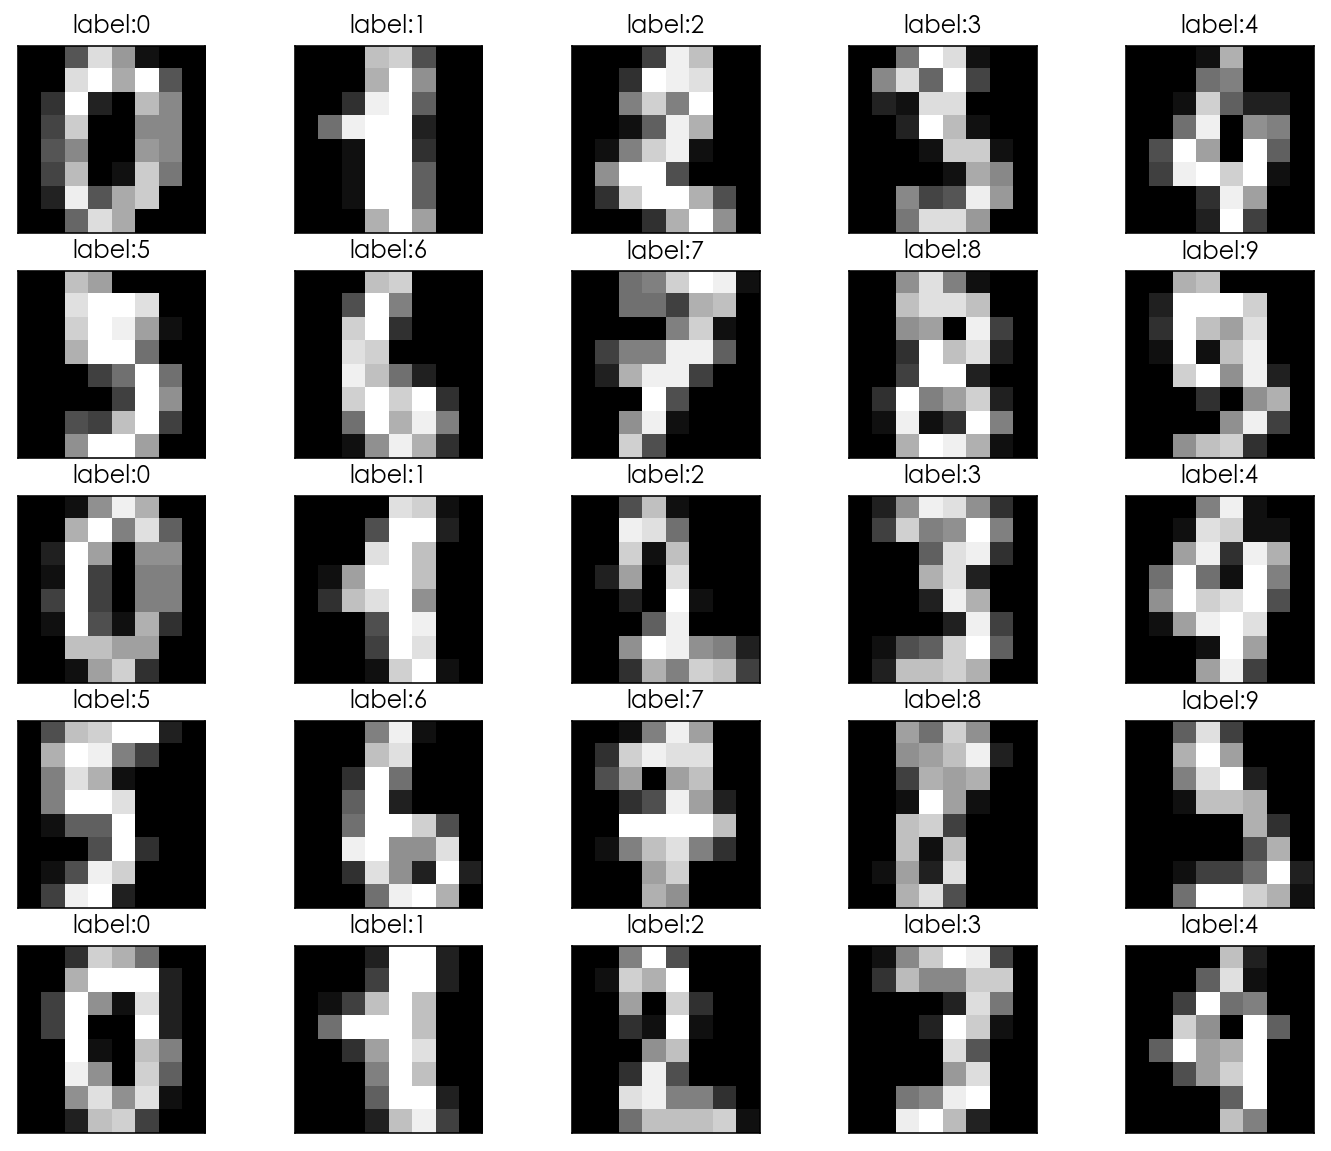

In [3]:
plt.figure(figsize=(12, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.title('label:{}'.format(y[i]))
    plt.imshow(X[i].reshape(8, 8), cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())
plt.show()

In [16]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [18]:
y_pred = svc.predict(X_test)

In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      0.34      0.51        38
          1       1.00      0.40      0.57        30
          2       1.00      0.37      0.54        35
          3       1.00      0.18      0.31        44
          4       1.00      0.43      0.60        42
          5       0.11      1.00      0.20        30
          6       1.00      0.33      0.50        30
          7       1.00      0.22      0.36        36
          8       1.00      0.03      0.05        39
          9       1.00      0.22      0.36        36

avg / total       0.93      0.34      0.40       360



In [53]:
for i in range(10):
    print(np.sum(y_test == i))

38
30
35
44
42
30
30
36
39
36


In [55]:
y_test[y_pred == 0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### 预测是 5 的那些数据里，真实是 5 的概率，这是精准度

In [60]:
np.sum(y_test[y_pred == 5] == 5) / np.sum(y_pred == 5)

0.11152416356877323

### 真实是 5 的那些数据里，预测是 5 的有多少，除以 support ，就是召回率

In [62]:
y_pred[y_test==5] # 可以看到，全部是 5， 这和此时的 recall = 1 是符合的

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5])

## 标准化以后，预测准确度会高很多

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [5]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train_scaler, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
y_pred = svc.predict(X_test_scaler)

In [7]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        38
          1       1.00      0.97      0.98        30
          2       0.97      1.00      0.99        35
          3       1.00      0.95      0.98        44
          4       0.95      0.98      0.96        42
          5       0.97      0.97      0.97        30
          6       1.00      1.00      1.00        30
          7       1.00      1.00      1.00        36
          8       0.93      0.97      0.95        39
          9       1.00      0.97      0.99        36

avg / total       0.98      0.98      0.98       360



In [69]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

svc = LinearSVC()
svc.fit(X_train_scaler, y_train)
y_pred = svc.predict(X_test_scaler)

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.97      0.97      0.97        38
          1       1.00      0.97      0.98        30
          2       1.00      0.97      0.99        35
          3       0.95      0.91      0.93        44
          4       0.95      1.00      0.98        42
          5       0.90      0.93      0.92        30
          6       0.94      0.97      0.95        30
          7       1.00      1.00      1.00        36
          8       0.95      1.00      0.97        39
          9       0.97      0.92      0.94        36

avg / total       0.96      0.96      0.96       360

